In [49]:
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.python.layers.core import Dense, Dropout


df=pd.read_csv('finalPCA.csv')

X=df.drop(['y'],axis=1)
y=df['y']



x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train.shape:" ,x_train.shape)
print("y_train.shape:" ,y_train.shape)
print("x_test.shape:" ,x_test.shape)
print("y_test.shape:" ,y_test.shape)

x_train.shape: (36168, 18)
y_train.shape: (36168,)
x_test.shape: (9043, 18)
y_test.shape: (9043,)


In [50]:
df.head()

,Unnamed: 0,age,education,balance,day,month,duration,campaign,pdays,previous,y,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,0,1.651055,2,1.027653,5,5,0.147445,-0.870092,0.0,0.0,0,-0.977435,0.490974,-0.169525,-0.370608,0.931344,-0.254142,-0.108786,-0.208366
1,1,0.302248,1,-0.768817,5,5,-0.474910,-0.870092,0.0,0.0,0,-0.846006,-0.540116,-1.107939,-0.091377,-0.069491,0.645389,-0.299522,-0.469378
2,2,-0.757528,1,-0.791761,5,5,-0.899243,-0.870092,0.0,0.0,0,-1.143216,0.589516,-0.002114,1.109814,0.251700,-0.020617,-0.261821,-0.172624
3,3,0.591279,3,0.486333,5,5,-0.808718,-0.870092,0.0,0.0,0,-1.247110,0.619359,-0.125332,-0.306701,-0.382120,-0.258093,0.275624,-0.034303
4,4,-0.757528,3,-0.792611,5,5,-0.208994,-0.870092,0.0,0.0,0,0.268562,0.149515,-1.509453,-0.077746,-0.175880,-0.182524,-0.176405,-0.256351


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(18, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


smote_tomek = SMOTETomek(random_state=42)

X_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)
history = model.fit(X_train_scaled, y_resampled, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1937/1937 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8332 - loss: 0.3742 - val_accuracy: 0.8466 - val_loss: 0.3296
Epoch 2/10
1937/1937 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8961 - loss: 0.2604 - val_accuracy: 0.8556 - val_loss: 0.3070
Epoch 3/10
1937/1937 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.2382 - val_accuracy: 0.8562 - val_loss: 0.3266
Epoch 4/10
1937/1937 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9082 - loss: 0.2255 - val_accuracy: 0.8766 - val_loss: 0.2657
Epoch 5/10
1937/1937 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9125 - loss: 0.2144 - val_accuracy: 0.8780 - val_loss: 0.2612
Epoch 6/10
1937/1937 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9147 - loss: 0.2060 - val_accuracy: 0.8506 - val_loss: 0.3260
Epoch 7/10
1937/1937 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9163 - loss: 0.2013 - val_accuracy: 0.8715 - val_loss: 0.2705
Epoch 8/10
1937/1937 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9194 - loss: 0.1968 - 

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test_scaled).round()))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7952
           1       0.48      0.79      0.59      1091

    accuracy                           0.87      9043
   macro avg       0.72      0.83      0.76      9043
weighted avg       0.91      0.87      0.88      9043



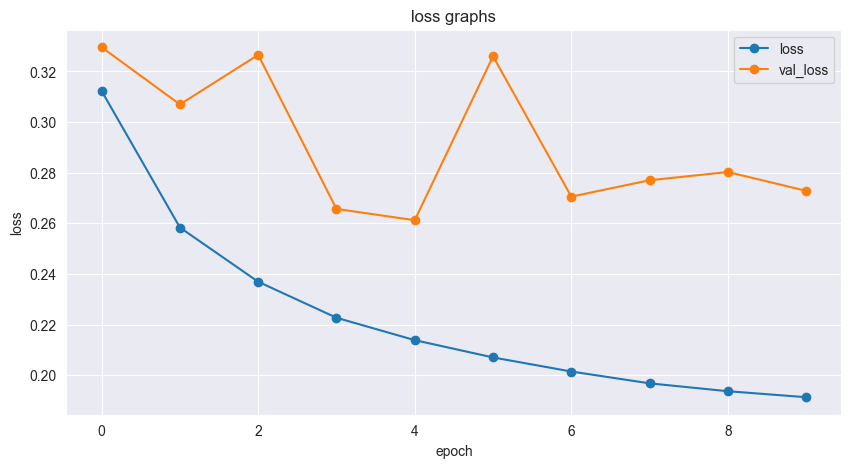

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss', marker='o')
plt.plot(history.history['val_loss'], label='val_loss',marker='o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("loss graphs")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
model = Sequential([
    Dense(18, input_dim=x_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
